# ESG EDA Notebook (World Bank via Hugging Face)

This notebook loads the **Global Environment–Social–Governance** dataset from Hugging Face, performs **basic EDA**, checks **missing values**, and renders a few **simple visualizations**.

**Dataset**: `Mahadih534/Global_Environment-Social-And-Governance-Data`
**File**: `ESGCSV.csv` (World Bank–style wide format)

> Tip: You can run this in Google Colab or GitHub Codespaces Jupyter.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100)


## Load dataset

In [2]:
try:
    df = pd.read_csv('hf://datasets/Mahadih534/Global_Environment-Social-And-Governance-Data/ESGCSV.csv')
    source_used = 'pandas hf:// URI'
except Exception as e:
    print('hf:// load failed, falling back to datasets library. Error:', e)
    try:
        from datasets import load_dataset
        ds = load_dataset('Mahadih534/Global_Environment-Social-And-Governance-Data')
        df = pd.DataFrame(ds['train'])
        source_used = 'datasets.load_dataset'
    except Exception as e2:
        raise RuntimeError('Failed to load dataset via both methods.')

print('Loaded via:', source_used)
print('Shape:', df.shape)
print('Columns:', list(df.columns)[:12], '...')
df.head()

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loaded via: pandas hf:// URI
Shape: (16969, 68)
Columns: ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967'] ...


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.998725,76.638513,78.084222,79.317256,80.412595,81.436463,82.364313,83.153561,83.852744,84.520175,84.995489,85.545061,86.024476,86.406487,86.705717,86.942778,87.228705,87.390856,87.617862,87.798740,87.948264,88.092536,NaN,NaN
1,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.964326,77.623521,78.521409,79.112320,81.108851,81.936223,81.904019,82.888219,82.830288,83.590460,85.815868,84.152501,83.838359,84.735838,87.482231,87.719569,87.402502,89.340705,88.832276,89.053852,89.539016,90.662754,89.176939,90.352802,90.635050,90.845661,NaN,NaN
2,Arab World,ARB,Adjusted savings: natural resources depletion ...,NY.ADJ.DRES.GN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.961207,6.065469,8.242519,11.302722,24.108772,16.683838,18.461057,18.377966,15.884196,33.643670,27.427013,20.161788,11.285801,9.753678,9.670800,8.289274,5.416472,6.875435,5.765414,7.849742,7.983244,8.360681,8.124148,8.070243,8.245936,7.845689,9.076897,7.773420,5.479318,6.976811,9.377097,7.561574,7.352450,8.647153,10.056139,12.062701,12.156493,11.130419,12.794641,7.994157,9.292306,12.665397,12.199566,11.176049,10.050554,6.130655,5.265859,6.245422,8.187714,7.234436,4.598506,NaN,NaN,NaN
3,Arab World,ARB,Adjusted savings: net forest depletion (% of GNI),NY.ADJ.DFOR.GN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.174568,0.139287,0.132084,0.152424,0.087390,0.098760,0.066341,0.102411,0.107103,0.074228,0.057760,0.055111,0.114144,0.081489,0.079541,0.038306,0.089656,0.085068,0.089702,0.087330,0.067230,0.071939,0.057122,0.044027,0.045949,0.062263,0.058694,0.055242,0.077565,0.036729,0.021056,0.024409,0.026641,0.032390,0.024895,0.020664,0.021369,0.017943,0.024938,0.028746,0.029684,0.030113,0.033494,0.065108,0.084361,0.096672,0.092911,0.102684,0.057123,0.064516,0.075686,NaN,NaN,NaN
4,Arab World,ARB,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,30.981414,30.982663,31.007054,31.018001,31.042466,31.0504,31.103223,31.133565,31.190429,31.254493,31.386588,31.499948,31.496808,31.550807,31.529648,31.599736,31.621997,31.666078,31.678494,31.758868,31.454314,31.480303,31.528747,31.942270,32.442177,33.026539,33.582999,34.186977,34.697784,35.109453,35.159977,35.321083,36.096181,36.750654,37.380826,37.977641,38.488463,39.096353,39.622190,39.656941,39.679751,39.752997,39.941566,39.991253,40.048478,40.119766,40.172169,40.111560,40.122131,40.160303,40.176419,39.789967,39.838650,39.834421,39.872575,39.937814,39.984452,39.969738,39.907031,39.973290,39.970742,NaN,NaN


## Tidy the data


In [3]:
# Detect year columns (e.g., '1990', '1991', ...)
year_cols = [c for c in df.columns if str(c).isdigit()]
meta_cols = [c for c in df.columns if c not in year_cols]
if not year_cols:
    raise ValueError('No year columns detected; check the dataset structure.')

tidy = df.melt(id_vars=meta_cols, value_vars=year_cols,
               var_name='Year', value_name='Value')
tidy['Year'] = pd.to_numeric(tidy['Year'], errors='coerce')
tidy = tidy.dropna(subset=['Year'])

# Standardize column names where possible
rename_map = {
    'Country Name': 'Country_Name',
    'Country Code': 'Country_Code',
    'Indicator Name': 'Indicator_Name',
    'Indicator Code': 'Indicator_Code'
}
tidy = tidy.rename(columns=rename_map)

print('Tidy shape:', tidy.shape)
tidy.head()

Tidy shape: (1086016, 6)


,Country_Name,Country_Code,Indicator_Name,Indicator_Code,Year,Value
0,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,1960,NaN
1,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,1960,NaN
2,Arab World,ARB,Adjusted savings: natural resources depletion ...,NY.ADJ.DRES.GN.ZS,1960,NaN
3,Arab World,ARB,Adjusted savings: net forest depletion (% of GNI),NY.ADJ.DFOR.GN.ZS,1960,NaN
4,Arab World,ARB,Agricultural land (% of land area),AG.LND.AGRI.ZS,1960,NaN


## Missing data check

In [4]:
# Missingness by indicator
missing_by_indicator = tidy.groupby('Indicator_Code')['Value'].apply(lambda s: s.isna().mean()).sort_values(ascending=False)
print('Proportion missing by indicator (top 15):')
print(missing_by_indicator.head(15))

# Missingness by country (latest decade to keep it small)
latest_year = tidy['Year'].max()
recent = tidy[tidy['Year'] >= latest_year - 10]
missing_by_country = recent.groupby('Country_Name')['Value'].apply(lambda s: s.isna().mean()).sort_values(ascending=False)
print('\nProportion missing by country, last decade (top 15):')
print(missing_by_country.head(15))

Proportion missing by indicator (top 15):
Indicator_Code
SI.SPR.PCAP.ZG       0.991959
EN.H2O.BDYS.ZS       0.991240
EN.MAM.THRD.NO       0.984375
SL.TLF.0714.ZS       0.981629
SP.UWT.TFRT          0.952798
SH.DTH.COMM.ZS       0.940115
EN.CLC.GHGR.MT.CE    0.938481
SI.POV.NAHC          0.933774
EN.CLC.CSTP.ZS       0.932924
ER.PTD.TOTL.ZS       0.894678
IC.LGL.CRED.XQ       0.894286
SI.DST.FRST.20       0.863559
SI.POV.GINI          0.863494
SD.ESR.PERF.XQ       0.857610
SE.ADT.LITR.ZS       0.828648
Name: Value, dtype: float64

Proportion missing by country, last decade (top 15):
Country_Name
Monaco                                                0.672215
Pacific island small states                           0.646607
San Marino                                            0.641485
Liechtenstein                                         0.614597
Caribbean small states                                0.608195
Small states                                          0.596671
Other small states  

## Visualization 1: Single-indicator time series (example)

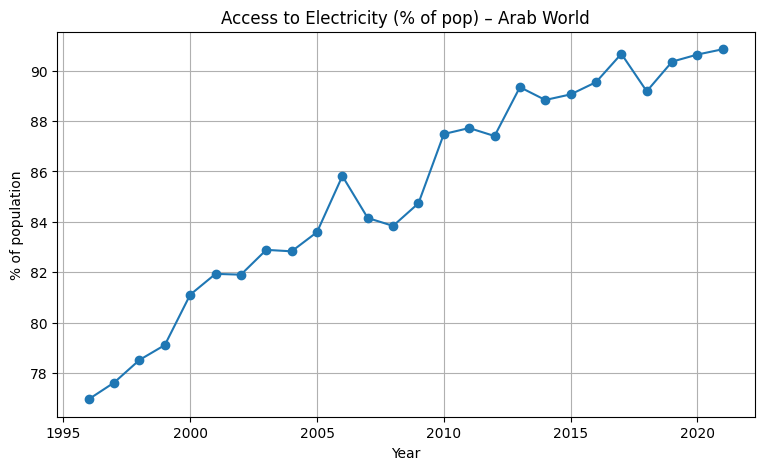

In [5]:
example_indicator = 'EG.ELC.ACCS.ZS'   # Access to electricity (% of population)
example_country = 'Arab World'

sub = tidy[(tidy['Indicator_Code'] == example_indicator) & (tidy['Country_Name'] == example_country)].dropna(subset=['Value'])
plt.figure(figsize=(9,5))
plt.plot(sub['Year'], sub['Value'], marker='o')
plt.title(f'Access to Electricity (% of pop) – {example_country}')
plt.xlabel('Year')
plt.ylabel('% of population')
plt.grid(True)
plt.show()

## Visualization 2: Multi-country comparison (CO₂ per capita)

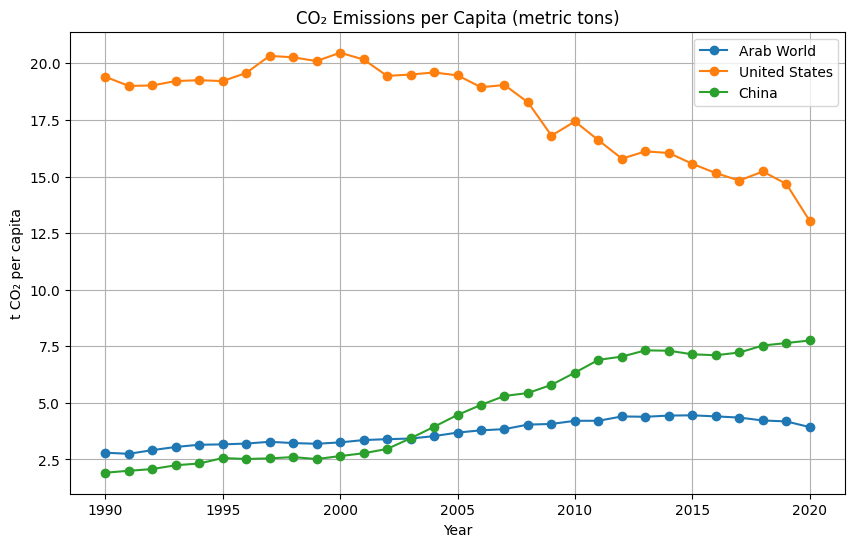

In [6]:
indicator = 'EN.ATM.CO2E.PC'
countries = ['Arab World', 'United States', 'China']

sub = tidy[(tidy['Indicator_Code'] == indicator) & (tidy['Country_Name'].isin(countries))].dropna(subset=['Value'])
plt.figure(figsize=(10,6))
for c in countries:
    s = sub[sub['Country_Name']==c]
    plt.plot(s['Year'], s['Value'], marker='o', label=c)
plt.legend()
plt.title('CO₂ Emissions per Capita (metric tons)')
plt.xlabel('Year')
plt.ylabel('t CO₂ per capita')
plt.grid(True)
plt.show()

## Visualization 3: Distribution for latest year (CO₂ per capita)

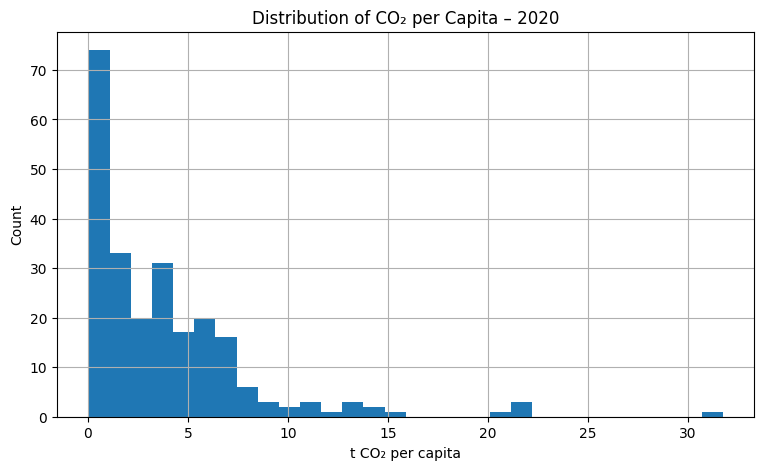

In [7]:
co2 = tidy[tidy['Indicator_Code']==indicator].dropna(subset=['Value'])
latest = int(co2['Year'].max())
co2_latest = co2[co2['Year']==latest]['Value']
plt.figure(figsize=(9,5))
plt.hist(co2_latest, bins=30)
plt.title(f'Distribution of CO₂ per Capita – {latest}')
plt.xlabel('t CO₂ per capita')
plt.ylabel('Count')
plt.grid(True)
plt.show()

## Correlation across indicators for one country

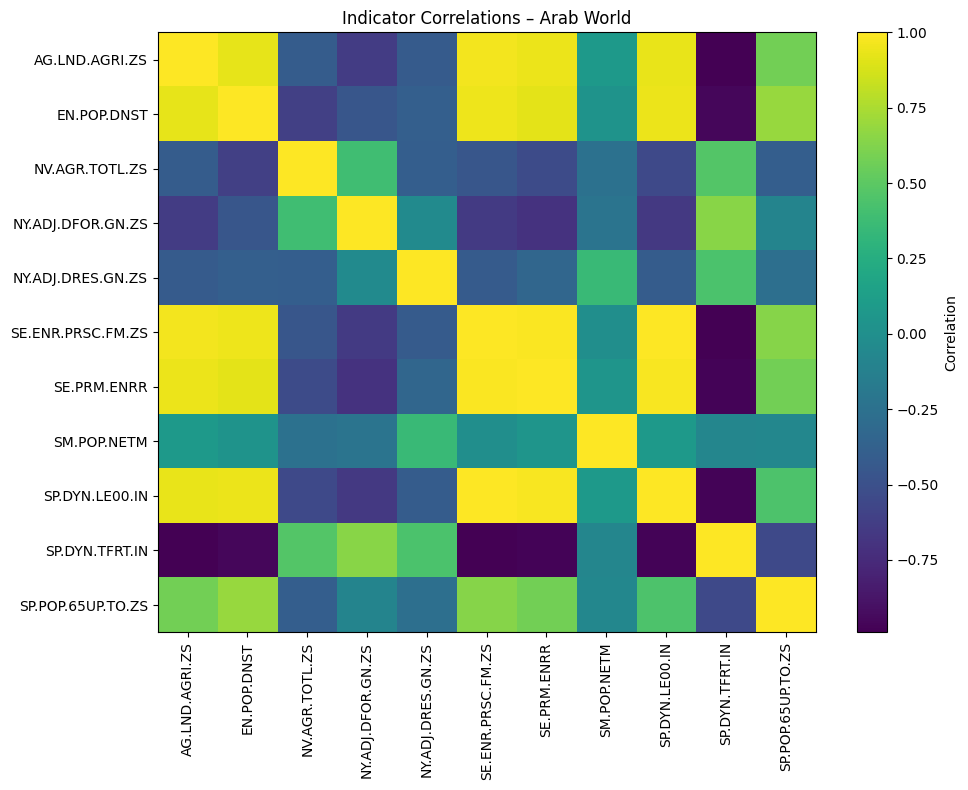

In [8]:
country = 'Arab World'
country_wide = tidy[tidy['Country_Name']==country].pivot_table(index='Year', columns='Indicator_Code', values='Value')

# Keep columns with enough data
country_wide = country_wide.dropna(axis=1, thresh=int(0.8*len(country_wide)))
corr = country_wide.corr()

plt.figure(figsize=(10,8))
plt.imshow(corr, aspect='auto')
plt.colorbar(label='Correlation')
plt.title(f'Indicator Correlations – {country}')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.tight_layout()
plt.show()